In [1]:
import pandas as pd
df = pd.read_csv("Resources/Week10-Day1-Activity4-Hodrick_Prescott-IVV.csv",
                parse_dates=['date'],
                index_col=['date'])

In [2]:
df.head()

,open,high,low,close,volume
date,,,,,
2017-01-03,226.40,227.20,225.24,226.58,6396573
2017-01-04,226.96,228.11,226.95,227.95,4099048
2017-01-05,227.63,227.96,226.85,227.74,2970122
2017-01-06,227.91,229.13,227.28,228.64,3110142
2017-01-09,228.27,228.47,227.81,227.90,2360642


In [3]:
df.tail()

,open,high,low,close,volume
date,,,,,
2018-12-24,240.80,242.00,236.04,236.09,6418996
2018-12-26,237.73,247.89,235.46,247.67,13154113
2018-12-27,244.33,250.07,240.67,250.06,12693625
2018-12-28,251.03,252.88,247.95,249.33,10856339
2018-12-31,251.04,251.63,248.99,251.61,10117850


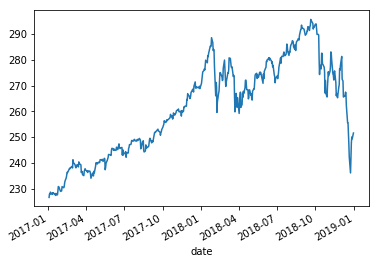

In [14]:
df.close.plot()

In [12]:
SMA = df.close.rolling(window = 10).mean()

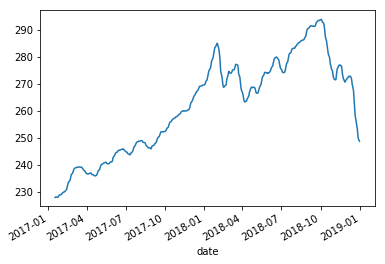

In [15]:
#notice the graph is more smooth
SMA.plot()

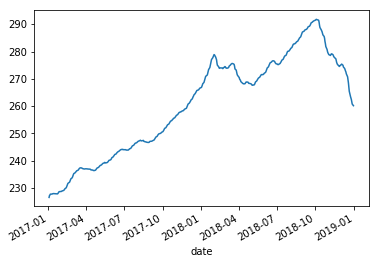

In [16]:
SMA = df.close.ewm(halflife = 10).mean().plot()

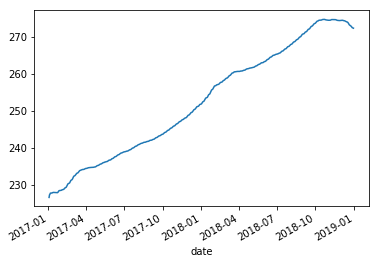

In [17]:
#bigger the halflife - smoother the graph
SMA = df.close.ewm(halflife = 100).mean().plot()

In [18]:
import statsmodels.api as sm


In [20]:
#first line shows the noise 
#second line shows the trend
sm.tsa.filters.hpfilter(df['close'])

(date
 2017-01-03    -0.482347
 2017-01-04     0.776452
 2017-01-05     0.455552
 2017-01-06     1.244771
 2017-01-09     0.393638
                 ...    
 2018-12-24   -14.547868
 2018-12-26    -1.471463
 2018-12-27     2.396631
 2018-12-28     3.134170
 2018-12-31     6.877411
 Name: close_cycle, Length: 502, dtype: float64,
 date
 2017-01-03    227.062347
 2017-01-04    227.173548
 2017-01-05    227.284448
 2017-01-06    227.395229
 2017-01-09    227.506362
                  ...    
 2018-12-24    250.637868
 2018-12-26    249.141463
 2018-12-27    247.663369
 2018-12-28    246.195830
 2018-12-31    244.732589
 Name: close_trend, Length: 502, dtype: float64)

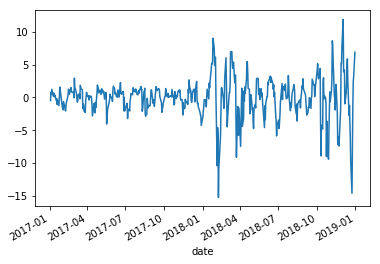

In [21]:
noise, trend = sm.tsa.filters.hpfilter(df['close'])
noise.plot()

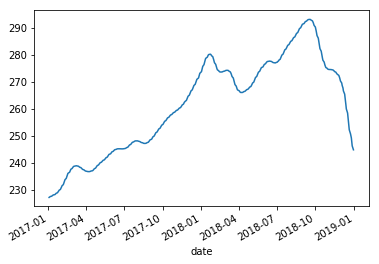

In [22]:
trend.plot()